In [1]:
# importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# loading data
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin1")

C:\Users\Rahul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
data.shape # 181691 rows and 135 columns.

(181691, 135)

In [6]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
df=data.dropna(axis=1)

In [8]:
df.head(15)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1
5,197001010002,1970,1,1,0,217,United States,1,North America,0,...,Black Nationalists,0,5,Firearms,1,Hewitt Project,-9,-9,0,-9
6,197001020001,1970,1,2,0,218,Uruguay,3,South America,0,...,Tupamaros (Uruguay),0,5,Firearms,0,PGIS,0,0,0,0
7,197001020002,1970,1,2,0,217,United States,1,North America,0,...,Unknown,0,6,Explosives,1,Hewitt Project,-9,-9,0,-9
8,197001020003,1970,1,2,0,217,United States,1,North America,0,...,New Year's Gang,0,8,Incendiary,1,Hewitt Project,0,0,0,0
9,197001030001,1970,1,3,0,217,United States,1,North America,0,...,New Year's Gang,0,8,Incendiary,1,Hewitt Project,0,0,0,0


In [9]:
df.drop(["INT_LOG"],axis=1,inplace=True)
df.drop(["INT_IDEO"],axis=1,inplace=True)
df.drop(["INT_MISC"],axis=1,inplace=True)
df.drop(["INT_ANY"],axis=1,inplace=True)
df.drop(["property"],axis=1,inplace=True)
df.drop(["vicinity"],axis=1,inplace=True)

C:\Users\Rahul\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
df.shape 

(181691, 23)

In [11]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,individual,weaptype1
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,0.988530,0.993093,0.875668,0.889598,0.036507,3.247547,8.439719,0.002950,6.447325
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,0.106483,0.082823,0.329961,0.313391,0.187549,1.915772,6.653838,0.054234,2.173435
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,0.000000,5.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,0.000000,6.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,14.000000,0.000000,6.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,1.000000,13.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
eventid            181691 non-null int64
iyear              181691 non-null int64
imonth             181691 non-null int64
iday               181691 non-null int64
extended           181691 non-null int64
country            181691 non-null int64
country_txt        181691 non-null object
region             181691 non-null int64
region_txt         181691 non-null object
crit1              181691 non-null int64
crit2              181691 non-null int64
crit3              181691 non-null int64
success            181691 non-null int64
suicide            181691 non-null int64
attacktype1        181691 non-null int64
attacktype1_txt    181691 non-null object
targtype1          181691 non-null int64
targtype1_txt      181691 non-null object
gname              181691 non-null object
individual         181691 non-null int64
weaptype1          181691 non-null int64
weaptype1_txt      1816

In [13]:
df["country_txt"].value_counts(ascending=False)

Iraq             24636
Pakistan         14368
Afghanistan      12731
India            11960
Colombia          8306
                 ...  
International        1
Andorra              1
South Vietnam        1
Vatican City         1
North Korea          1
Name: country_txt, Length: 205, dtype: int64

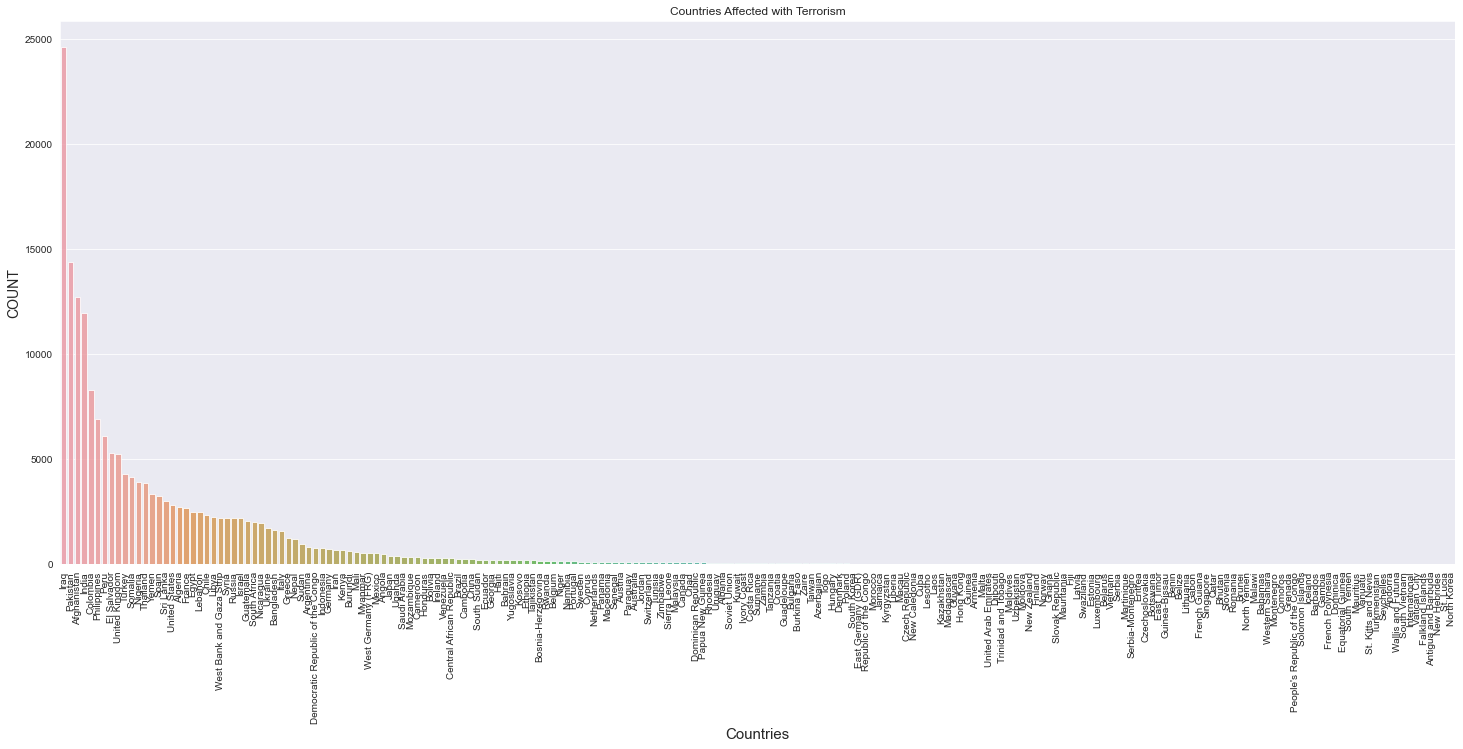

In [14]:
sns.set_style("darkgrid")
ls=df['country_txt'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(25,10))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('Countries Affected with Terrorism')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('Countries', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  """


<AxesSubplot:ylabel='country_txt'>

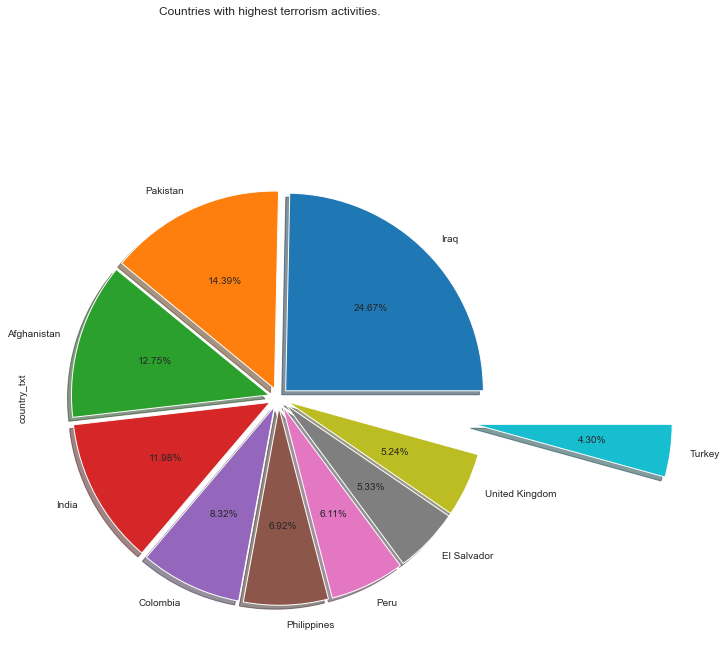

In [15]:
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("Countries with highest terrorism activities.")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
df['country_txt'].value_counts().head(10).plot('pie',autopct="%0.2f%%",explode=explode,shadow = True,ax=ax1)

### Iraq has the highest terror attacks followed by pakistan , Afghanistan and India.

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  """


<AxesSubplot:ylabel='attacktype1_txt'>

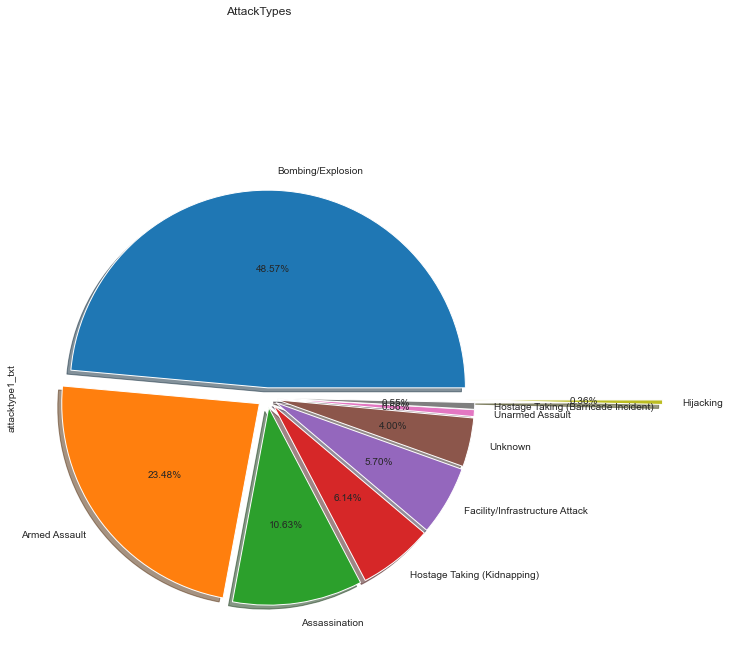

In [16]:
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("AttackTypes")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
df['attacktype1_txt'].value_counts().head(10).plot('pie',autopct="%0.2f%%",explode=explode,shadow = True,ax=ax1)

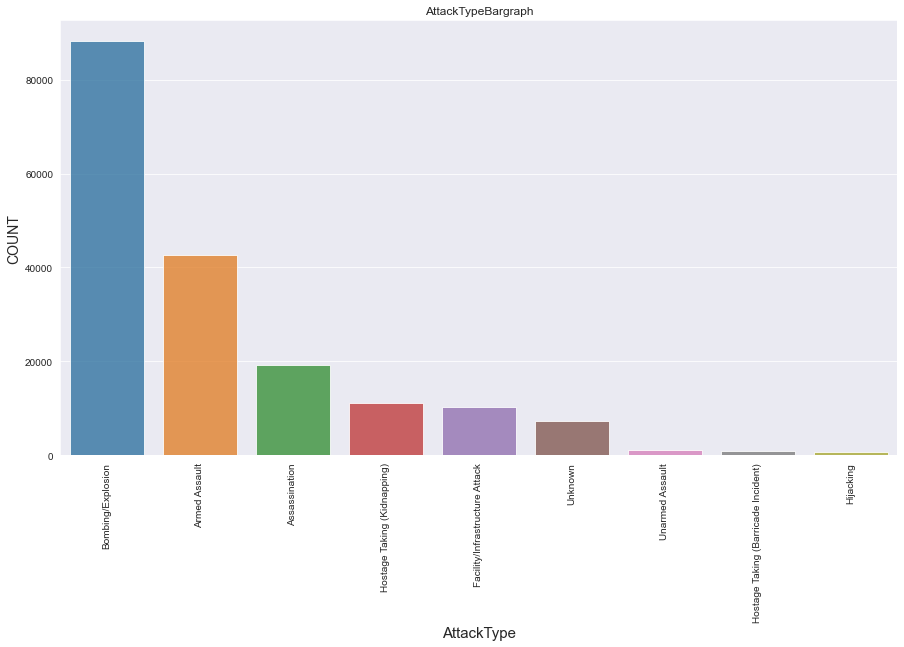

In [17]:
sns.set_style("darkgrid")
ls=df['attacktype1_txt'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('AttackTypeBargraph')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('AttackType', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

### Around 50 percent of the terrorism is involved with Bomb/explosions.

In [18]:
df["region_txt"].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  """


<AxesSubplot:ylabel='region_txt'>

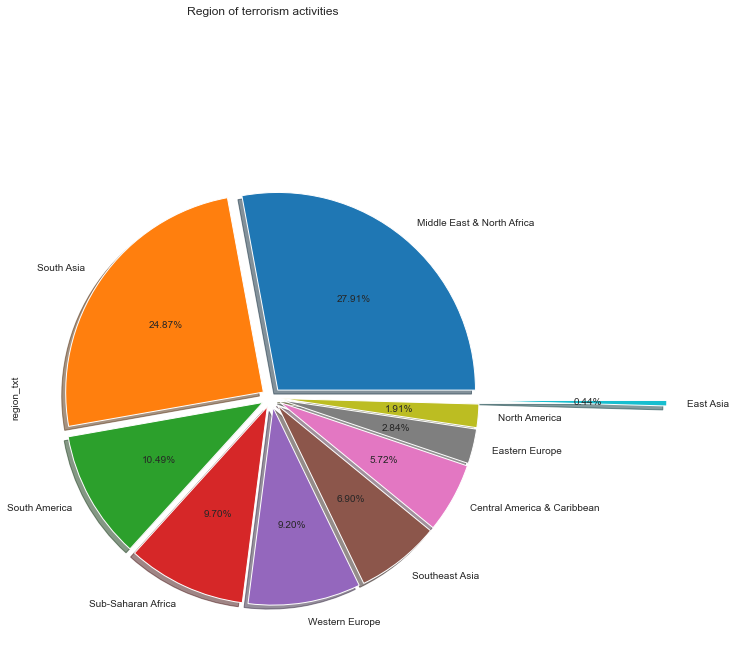

In [19]:
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("Region of terrorism activities")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
df['region_txt'].value_counts().head(10).plot('pie',autopct="%0.2f%%",explode=explode,shadow = True,ax=ax1)

### Middle East and North Africe have high terrorism followed by SouthAsian regions.

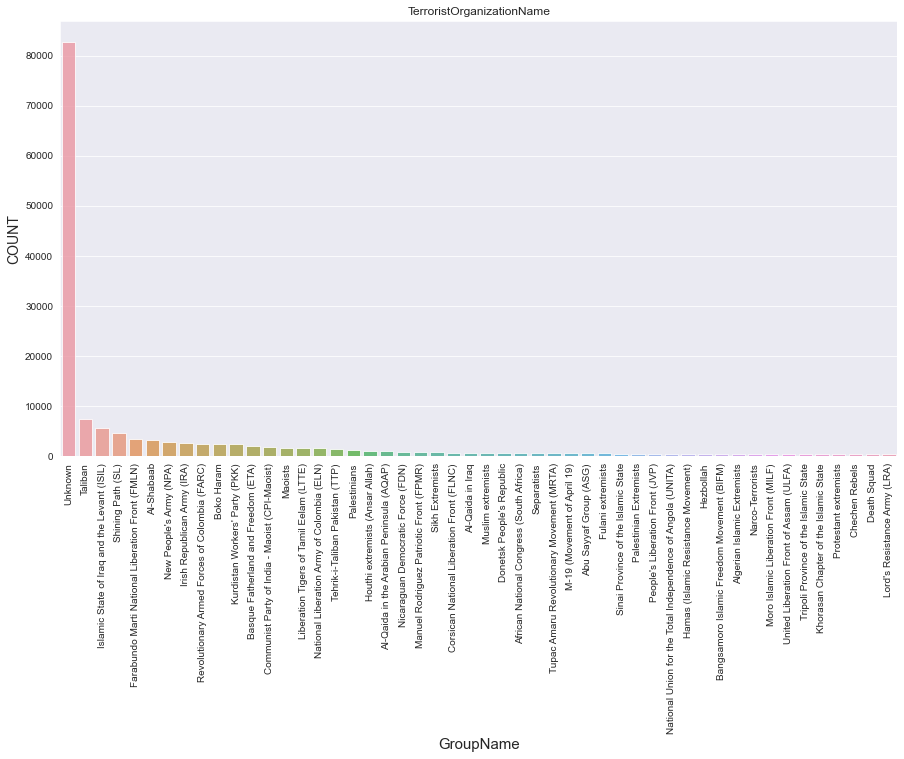

In [20]:
sns.set_style("darkgrid")
ls=df['gname'].value_counts().head(50).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('TerroristOrganizationName')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('GroupName', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  """


<AxesSubplot:ylabel='gname'>

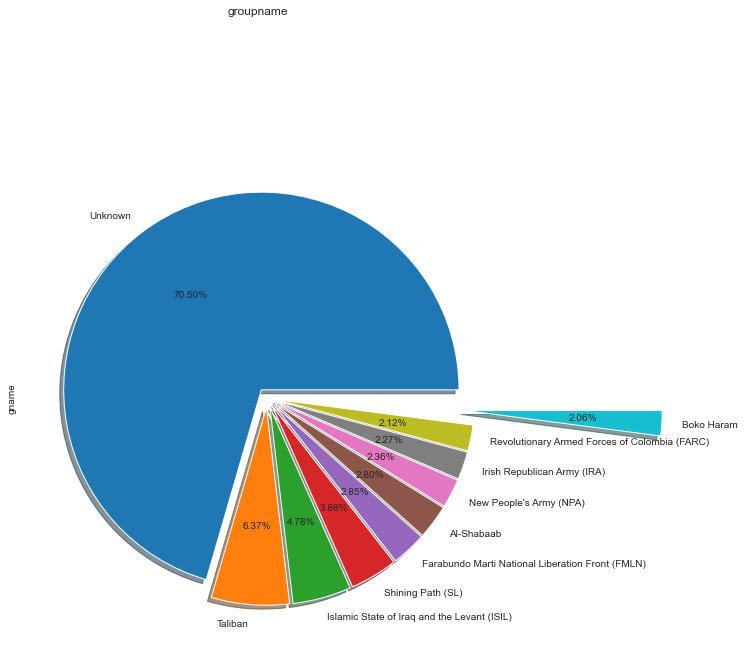

In [21]:
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("groupname")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
df['gname'].value_counts().head(10).plot('pie',autopct="%0.2f%%",explode=explode,shadow = True,ax=ax1)

### Around 70 percent terrorist activists are done by the unknown groups followed by Taliban and ISIL.

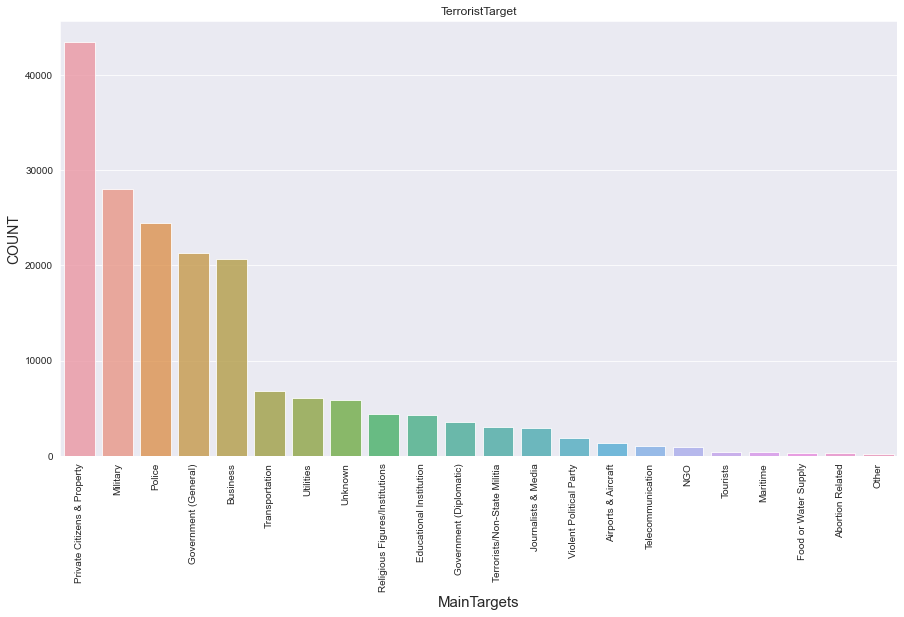

In [22]:
sns.set_style("darkgrid")
ls=df['targtype1_txt'].value_counts().head(50).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('TerroristTarget')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('MainTargets', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  """


<AxesSubplot:ylabel='targtype1_txt'>

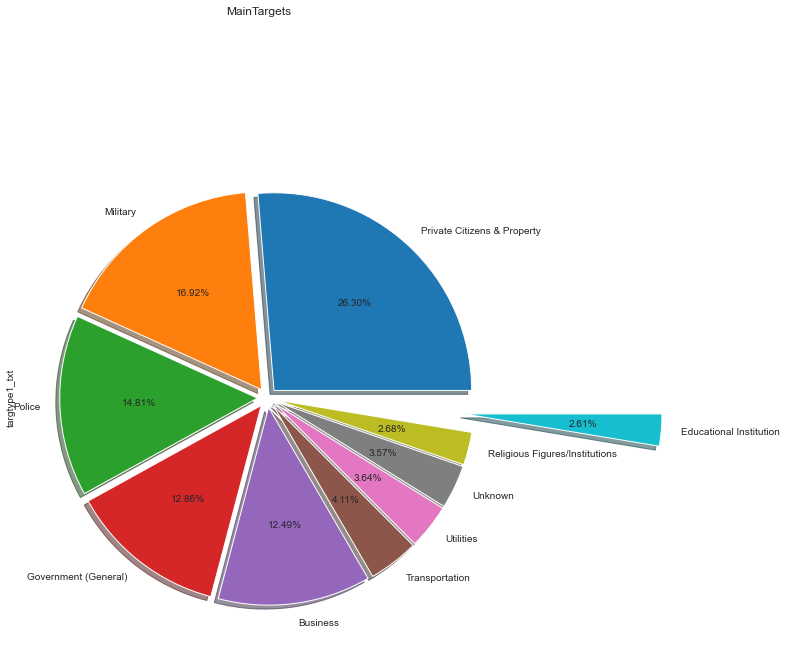

In [23]:
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("MainTargets")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
df['targtype1_txt'].value_counts().head(10).plot('pie',autopct="%0.2f%%",explode=explode,shadow = True,ax=ax1)

### Citizens and private property are the main target for terrorism activities followed by Military, Police.

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  """


<AxesSubplot:ylabel='weaptype1_txt'>

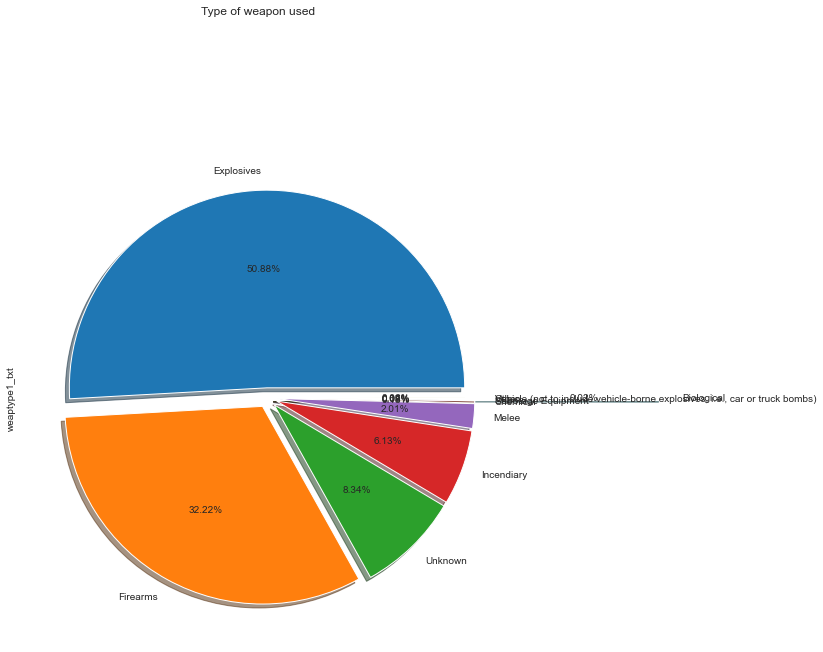

In [24]:
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("Type of weapon used")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
df['weaptype1_txt'].value_counts().head(10).plot('pie',autopct="%0.2f%%",explode=explode,shadow = True,ax=ax1)

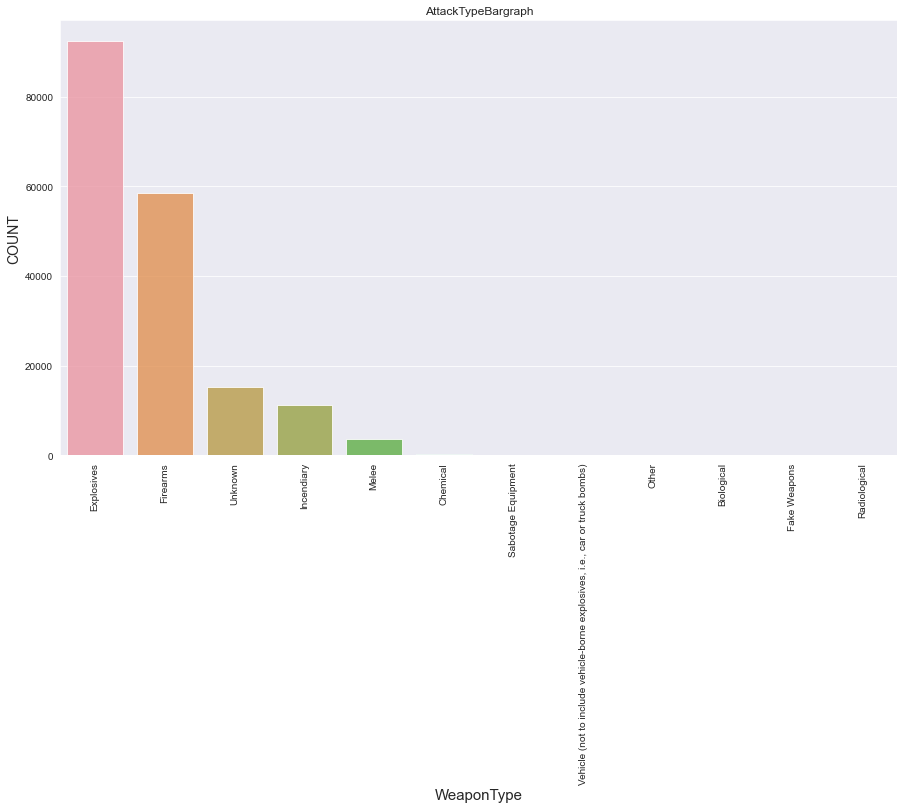

In [25]:
sns.set_style("darkgrid")
ls=df['weaptype1_txt'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('AttackTypeBargraph')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('WeaponType', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

### Explosives are the main choice for terrorism which contribute about 50 percent followed by Firearms.

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  """


<AxesSubplot:ylabel='iyear'>

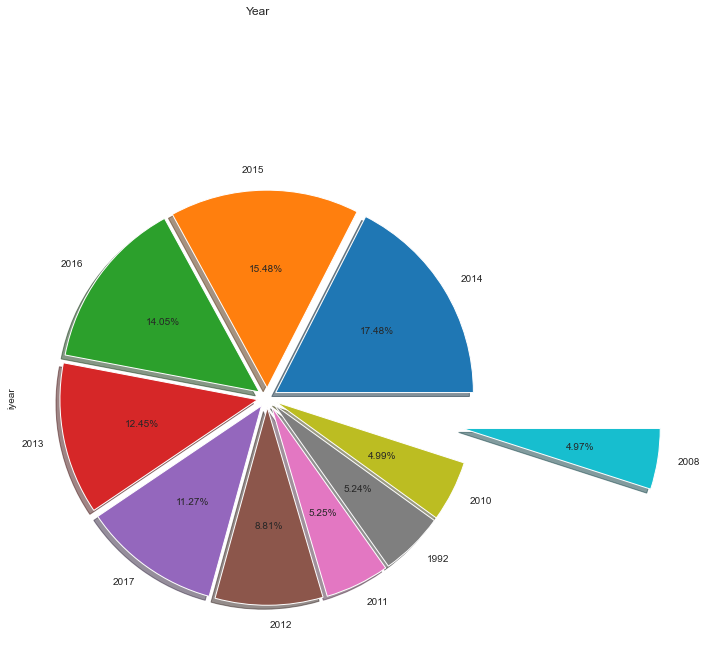

In [27]:
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("Year")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
df['iyear'].value_counts().head(10).plot('pie',autopct="%0.2f%%",explode=explode,shadow = True,ax=ax1)

### 2014 had the highest number of terrorist activities.

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  """


<AxesSubplot:ylabel='imonth'>

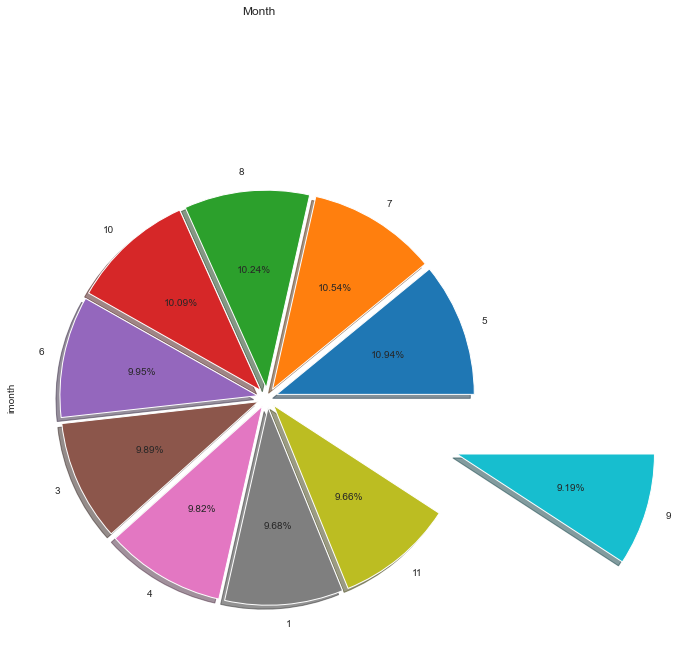

In [28]:
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("Month")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
df['imonth'].value_counts().head(10).plot('pie',autopct="%0.2f%%",explode=explode,shadow = True,ax=ax1)

### High terrorist activity in the month of May